# **Simple Linear Regression**

In this task i will implement regression model using sklearn libraray 

# **The Goal**

the aim of this project predict student's score according to the hourses study


### **The Author** :- **Mina Adel Markos**



## Model function

the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$


<center>
<img align="center" src="pic1.png"     style=" width:380px; padding: 10px; " > 
<center>


### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import kaleido

In [2]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
pio.templates.default = 'plotly_dark'

### **Importing Dataset**

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

### **Plot the figure to show relation between scores and hours**

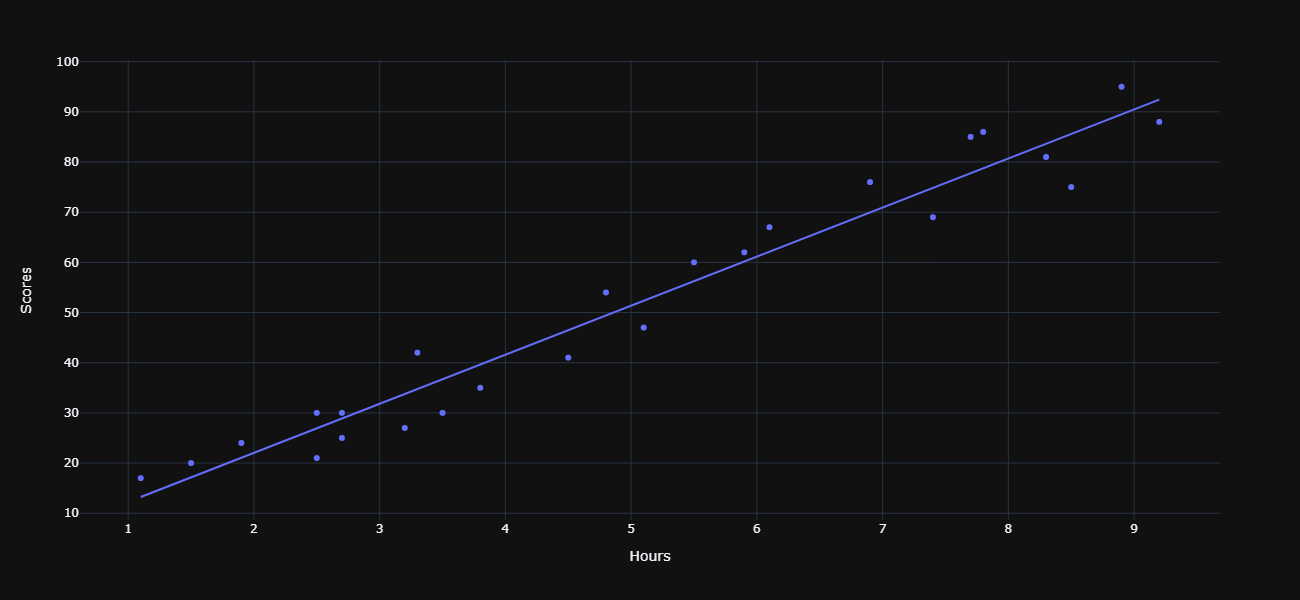

In [32]:
fig1 = px.scatter(df, x='Hours',y='Scores', trendline="ols")
fig1.show("png",width=1300,height=600)

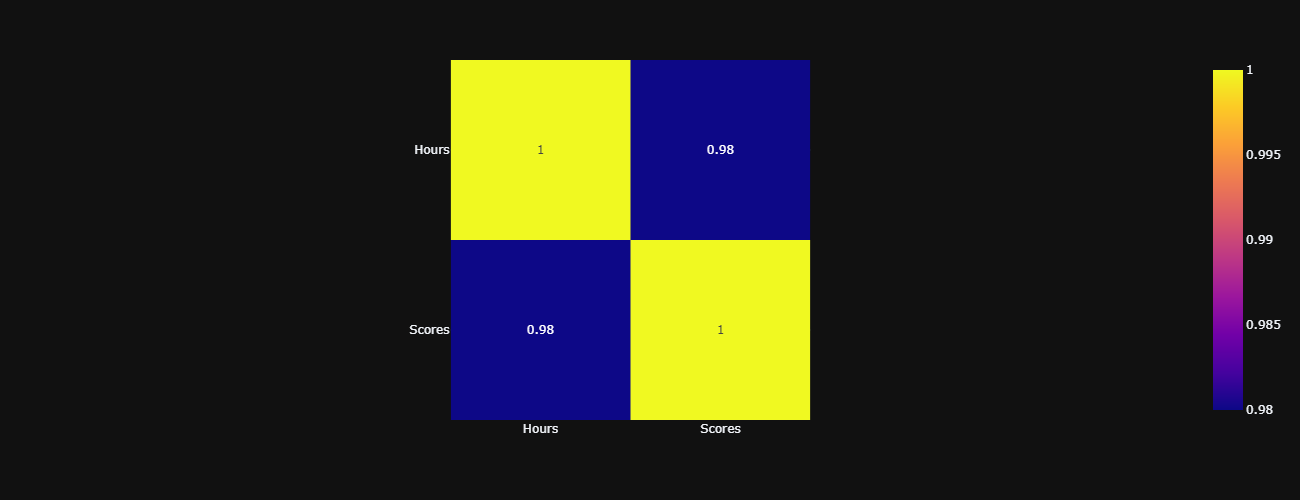

In [36]:
fig1 = px.imshow(df.corr().round(2), text_auto=True)
fig1.show("png",width=1300,height=500)

from previous graphs we can see that there is a positive relation between score and hours 

## **Split the Data**

In [9]:
df.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [12]:
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## **After find indpendened and depended values we can split by using train-test-split using sklearn library**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.1, random_state=42,shuffle=True)

In [15]:
X_train

array([6.9, 5.9, 2.7, 3.3, 5.1, 3.8, 1.5, 3.2, 4.5, 8.9, 8.5, 3.5, 2.7,
       1.9, 4.8, 6.1, 7.8, 5.5, 7.7, 1.1, 7.4, 9.2])

In [16]:
y_train

array([76, 62, 25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86,
       60, 85, 17, 69, 88], dtype=int64)

## **Convert 1D array to 2D array**

In [17]:
x_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_tset= X_test.reshape(-1, 1)
y_tset= y_test.reshape(-1, 1)

In [18]:
y_train

array([[76],
       [62],
       [25],
       [42],
       [47],
       [35],
       [20],
       [27],
       [41],
       [95],
       [75],
       [30],
       [30],
       [24],
       [54],
       [67],
       [86],
       [60],
       [85],
       [17],
       [69],
       [88]], dtype=int64)

In [19]:
x_train

array([[6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

## **Modeling**

using sklearn to implement the regression model

In [20]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [21]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.78385439]]
Intercept:  [2.69128676]


## **Make Prediction**

In [22]:
y_pedict = regr.predict(x_tset)

In [23]:
y_pedict

array([[83.89727817],
       [27.15092273],
       [27.15092273]])

In [24]:
y_tset

array([[81],
       [30],
       [21]], dtype=int64)

## **Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [25]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pedict - y_tset)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pedict - y_tset) ** 2))
print("R2-score: %.2f" % r2_score(y_tset , y_pedict) )

Mean absolute error: 3.97
Residual sum of squares (MSE): 18.12
R2-score: 0.97


## **Predict score with hourse = 9.25**

In [26]:
your_score = regr.predict([[9.25]])

## **Compare Between predict and actual value**

In [27]:
# You can also test with your own data
hours = 9.25
your_score = regr.coef_ * 9.25 + regr.intercept_
your_score

array([[93.19193983]])

In [28]:
df['Hours'].max()

9.2

In [29]:
df[df['Hours'] == 9.2]

,Hours,Scores
6,9.2,88
